PHYSICS 231 Radiation Lab Repurposed for ESS 469 Homework 1

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as scpy

In [3]:
file_path = 'Lab2AdataCSV.csv'
data = pd.read_csv(file_path) # load data into pandas dataframe
columns_to_remove = ['Number','Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4']  # List the column names to remove

data = data.drop(columns=columns_to_remove)

In [4]:
data_means = []
val = []
std_s = []
skew = []
kurtosis = []
count = 0
for i in range(len(data)):
    count = count + 1
    if count > 4:
        count = 0
        data_means.append(np.mean(val))
        std_s.append(np.std(val))
        skew.append(scpy.skew(val))
        kurtosis.append(scpy.kurtosis(val))
        val = []
        continue
    if count <= 4:
        val.append(data.at[i, 'Counts'])
print('stds: ' + str(std_s))
print(' means: ' + str(data_means))
print(' skews: ' + str(skew))
print(' kurtosis: ' + str(kurtosis))

stds: [16.161296358893985, 9.807522622966516, 9.443913383762052, 10.425329730996522, 19.189841062395487, 13.793114224133722, 41.47589661478098, 6.18465843842649, 35.54574517435244, 75.94241239254913]
 means: [270.25, 344.75, 396.25, 513.75, 653.5, 865.5, 1205.5, 1787.5, 2806.0, 4694.5]
 skews: [0.3918013189280747, 0.03488192444815559, -1.11026895166382, -0.2936350381374818, -0.55570815232337, -1.0426273063412963, 0.4409878089541745, -1.0272097060362337, -0.6872431934890914, 0.21601041689476333]
 kurtosis: [-1.4230112034207891, -1.9536267569508567, -0.7026634694099037, -1.5504690453854195, -1.2807064845425395, -0.7480060298279634, -1.4350628316905487, -0.7820069204152249, -1.0, -1.7135290109783243]


In [5]:
# calculate error
N = 5
def uncertainty(std_s, N):
    uncertainty = std_s / np.sqrt(N)
    return uncertainty
uncertainty = uncertainty(std_s,N)

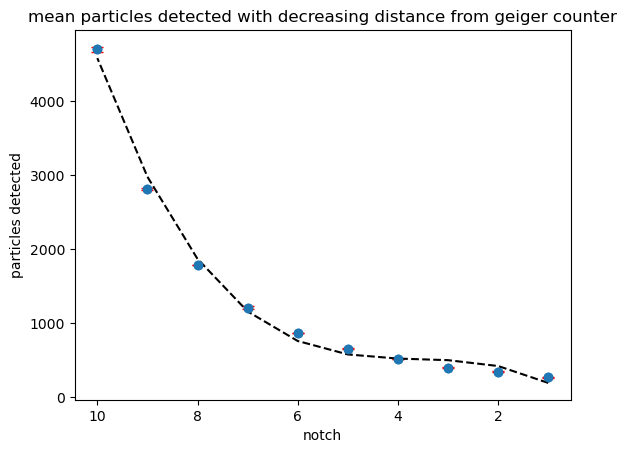

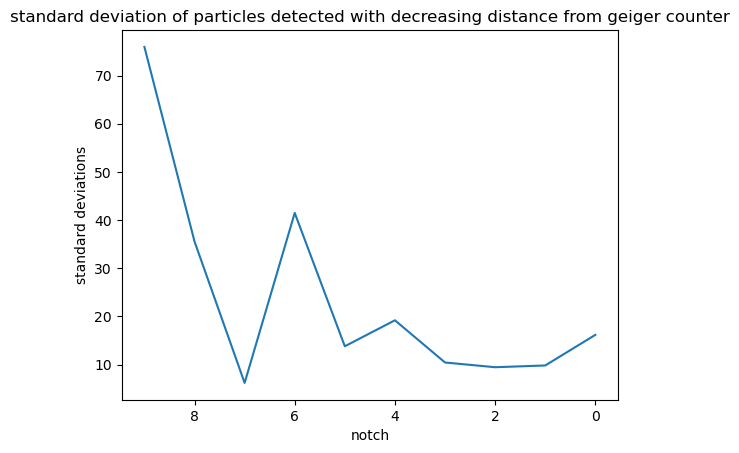

In [6]:
x = np.linspace(1,10,10).astype(int)
plt.scatter(x,data_means)
plt.title('mean particles detected with decreasing distance from geiger counter')
plt.errorbar(x,data_means, yerr=uncertainty, fmt='o', ecolor='red', capsize=4, label='Error Bars')
plt.ylabel('particles detected')
plt.xlabel('notch')
plt.gca().invert_xaxis()

# linearized
z = np.polyfit(x, data_means, 3)
p = np.poly1d(z)
plt.plot(x,p(x),"k--")


plt.savefig('mean particles detected.png', dpi=300, bbox_inches='tight')
plt.show()



plt.plot(std_s)
plt.title('standard deviation of particles detected with decreasing distance from geiger counter')
plt.ylabel('standard deviations')
plt.xlabel('notch')
plt.gca().invert_xaxis()


In [7]:
# Error propagation:
def linearize_data_and_error_prop(data_means, uncertainty):
    linearized_data_means = []
    linearized_uncertainty = []
    for i in range(len(uncertainty)): # fractional uncertainty multiplied by 1/2
        linearized_data_means.append(1/np.sqrt(data_means[i]))
        linearized_uncertainty.append(i/data_means[i] * 1/2)
    return linearized_data_means, linearized_uncertainty
means_and_uncertainty = linearize_data_and_error_prop(data_means, uncertainty)

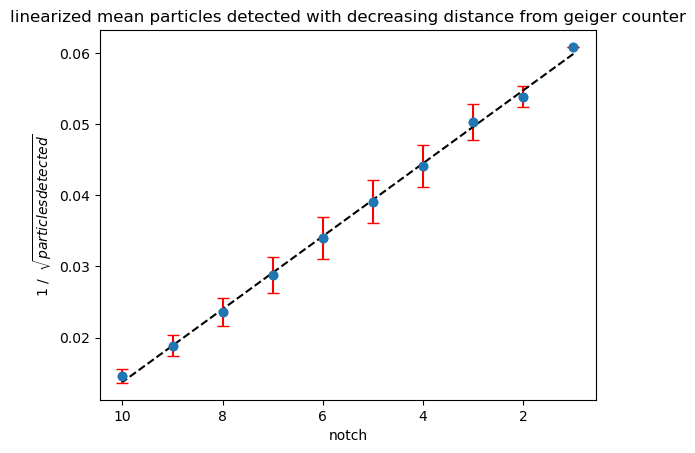

In [8]:
# linearized graph
z = np.polyfit(x, means_and_uncertainty[0], 1)
p = np.poly1d(z)
plt.scatter(x, means_and_uncertainty[0])
plt.errorbar(x,means_and_uncertainty[0], yerr=means_and_uncertainty[1], fmt='o', ecolor='red', capsize=4, label='Error Bars')
plt.title('linearized mean particles detected with decreasing distance from geiger counter')
plt.ylabel('1 /  $\sqrt{particles detected}}$ ')
plt.xlabel('notch')
plt.plot(x,p(x),"k--")
plt.gca().invert_xaxis()
plt.savefig('linearized mean particles detected.png', dpi=300, bbox_inches='tight')
plt.show()